# **5-Goal Difference according to time period**

### Soccer Stats

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager


from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime



#https://www.soccerstats.com/timing.asp?league=england

In [11]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_excel(r"C:\Users\lolen\Downloads\GD2.xlsx", dtype=str)


In [12]:
liga

,Overall,0-15,16-30,31-45,46-60,61-75,76-90
0,Arsenal,5-5,7-2,11-2,9-4,5-5,6-3
1,Aston Villa,3-6,5-4,6-4,6-4,6-5,7-11
2,Bournemouth,4-3,5-7,4-2,3-6,6-2,14-6
3,Brentford,7-4,8-9,6-6,6-7,4-3,9-10
4,Brighton,5-2,2-7,7-6,9-4,2-3,10-8
5,Chelsea,7-5,9-3,6-4,7-6,7-2,8-7
6,Crystal Palace,4-5,1-4,4-3,9-5,0-6,7-5
7,Everton,3-4,4-2,4-3,5-4,1-5,1-10
8,Fulham,5-2,5-2,3-6,3-9,6-3,12-8
9,Ipswich Town,6-7,2-5,5-9,2-9,2-6,3-7


In [36]:
scored = pd.DataFrame()
conceded = pd.DataFrame()
scored ["Team"] = liga.Overall
conceded ["Team"] = liga.Overall

g1 = []
a1 = []
for x in liga["0-15"]:
    a2 = x.split('-')
    g1.append(int(a2[0]))
    a1.append(int(a2[1]))
scored["0-15"] = g1
conceded["0-15"] =a1


g1 = []
a1 = []
for x in liga["16-30"]:
    a2 = x.split('-')
    g1.append(int(a2[0]))
    a1.append(int(a2[1]))
scored["16-30"] = g1
conceded["16-30"] =a1
        

g1 = []
a1 = []
for x in liga["31-45"]:
    a2 = x.split('-')
    g1.append(int(a2[0]))
    a1.append(int(a2[1]))
scored["31-45"] = g1
conceded["31-45"] =a1
        

g1 = []
a1 = []
for x in liga["46-60"]:
    a2 = x.split('-')
    g1.append(int(a2[0]))
    a1.append(int(a2[1]))
scored["46-60"] = g1
conceded["46-60"] =a1
        

g1 = []
a1 = []
for x in liga["61-75"]:
    a2 = x.split('-')
    g1.append(int(a2[0]))
    a1.append(int(a2[1]))
scored["61-75"] = g1
conceded["61-75"] =a1
        

g1 = []
a1 = []
for x in liga["76-90"]:
    a2 = x.split('-')
    g1.append(int(a2[0]))
    a1.append(int(a2[1]))
scored["76-90"] = g1
conceded["76-90"] =a1

league = list(liga["Overall"])
numbers = [ x for x in range(1,21) ]
user_input = -1

input_message = "Enter team index :\n"

for index, item in enumerate(league):
    input_message += f'{index+1}) {item}\n'

input_message += 'Your choice: '

while user_input not in numbers:
    user_input = int(input(input_message))
print('You picked: ' + league[(user_input) -1])



codes = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586,
         "Brighton" :10204,
                      "Leeds Utd" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle Utd" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester Utd" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nottm Forest":10203,
   "Wolverhampton":8602,
                    "West Ham Utd" :8654,
                   "Leicester City" : 8197,
               "Bournemouth" :8678,"Ipswich Town": 165}

clubs = []
for x in (liga["Overall"]):
    x = str(x)
    if x in codes:
        clubs.append(codes[x])  


You picked: Arsenal


In [37]:
df = scored[scored.Team ==league[(user_input) -1] ]
del df["Team"]
data = df.T
array_y = []
for x in data.iloc[:,0]:
    array_y.append(x)
array_x = df.columns

df = conceded[conceded.Team == league[(user_input) -1]]
del df["Team"]
dat = df.T
crray_y = []
for x in dat.iloc[:,0]:
    crray_y.append(x)
crray_x = df.columns

## **PLOT**

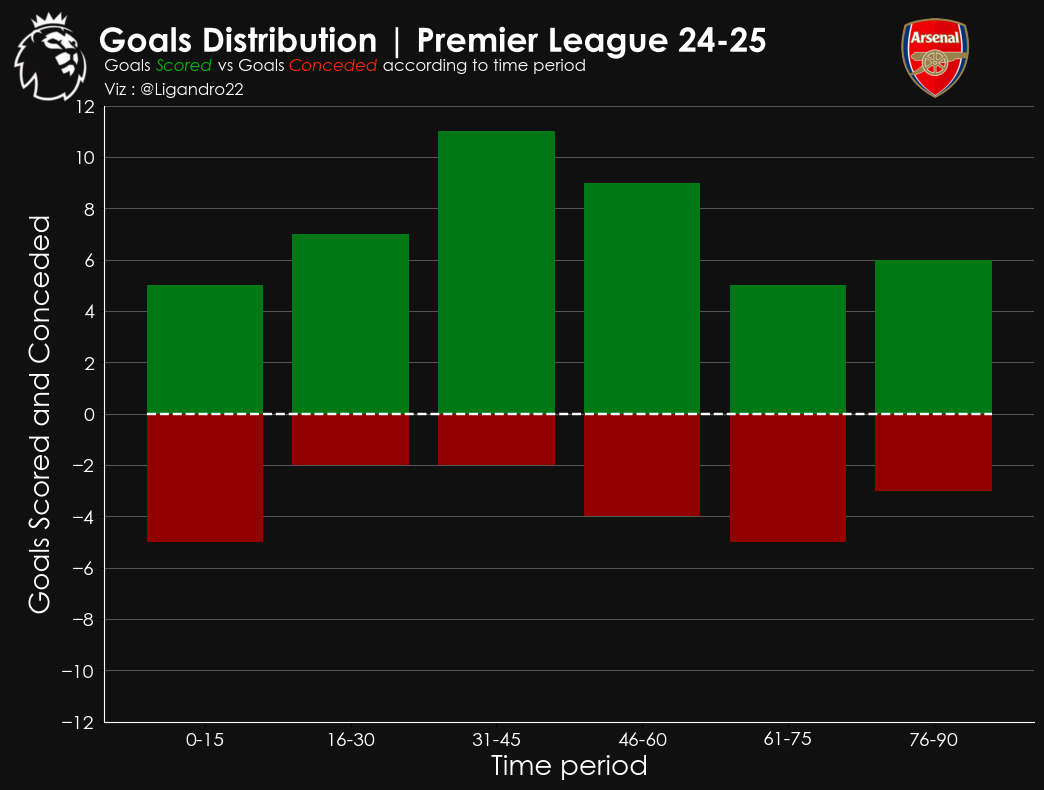

In [38]:
fig ,ax = plt.subplots(figsize=(12,8))
# -- Clean up the axes


f = "Century Gothic"
color1="#101010"
fig.set_facecolor(color1)
ax.patch.set_facecolor(color1)


ax.set_ylim(-12,12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.yaxis.set_ticks([-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12])

# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')
ax.spines["right"].set_color('white')   #spines removes the plot edges(border)
ax.spines["top"].set_color('white')

plt.xticks(fontname = f,color="white",size=14)
plt.yticks(fontname = f,color="white",size=14)


plt.ylabel("Goals Scored and Conceded",font =f,fontsize = 20,color="white")
plt.xlabel("Time period",font =f,fontsize = 20,color="white")

ax.yaxis.grid(color='gray', linestyle='-',alpha=0.6,zorder=-1)


crray_yn = [ -x for x in crray_y]
ax.bar(array_x,array_y,color="#007816",zorder=3)
ax.bar(crray_x,crray_yn,color="#930000",zorder=3)
ax.plot([-0.4,5.4], [0,0], color='white', linestyle='--' ,lw=1.75, alpha=1,zorder=4)

fig_text(
    x = 0.12, y = .94, 
    s = 'Goals Distribution | Premier League 24-25',
    fontname ="Century Gothic",path_effects=[path_effects.Stroke(linewidth=1.2, foreground=color1), path_effects.Normal()],
    va = 'bottom', ha = 'left',
    fontsize = 24,  weight = 'bold',color="white"
)


fig_text(
    x = 0.125, y = 0.92, 
    s =  "Goals <Scored> vs Goals <Conceded> according to time period",
    highlight_textprops=[{"color":"#00BB02", "style":"italic"},{"color":"#FF2600", "style":"italic"}],
    va = 'bottom', ha = 'left',fontname ="Century Gothic",
    fontsize = 12,color ='white'
)



fig.text(
    x = 0.125, y = 0.89, 
    s =  "Viz : @Ligandro22",
    va = 'bottom', ha = 'left',fontname ="Century Gothic",
    fontsize = 12,color ='white'
)

# add image
im1 = plt.imread(r"C:\Users\lolen\OneDrive\Documents\Coding\Neurotactic Essentials\Images\PREM.png")
ax_image = add_image(
          im1, fig, left=0.02, bottom=0.88, width=0.12, height=0.12
)   # these values might differ when you are plotting


club = clubs[(user_input) -1]

# -- Add Fancy Logo and Text
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((4.6,12.3))
ax_size = .1
image_ax = fig.add_axes(
    [ax_coords[0], ax_coords[1], ax_size, ax_size],
    fc='None'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{club}.png"))
image_ax.imshow(player_face)
image_ax.axis("off")


plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')